In [1]:
# 必要なライブラリのインポート
from sage.all import *

def verify_expressions():
    # 1. 変数の定義
    # K1, K2 は非負の実数、theta_mu は実数と仮定
    K1, K2, theta_mu = var('K1 K2 theta_mu')
    assume(K1 >= 0)
    assume(K2 >= 0)
    assume(theta_mu, 'real')

    # ---------------------------------------------------------
    # 式1 (Expression 1) の定義
    # ---------------------------------------------------------
    # 見やすくするため項ごとに分解して記述します
    # 分子 (Numerator)
    E1_num = (
        (exp(2*K1) + exp(-2*K1) + 1)
        - (exp(2*K1) - exp(-2*K1)) * (exp(2*K2) + exp(-2*K2)) * exp(I * theta_mu)
        + (exp(2*K1) + exp(-2*K1) - 1) * exp(2 * I * theta_mu)
    )
    
    # 分母 (Denominator)
    E1_den = (
        (exp(2*K1) + exp(-2*K1) + 1)
        - (exp(2*K1) - exp(-2*K1)) * (exp(2*K2) + exp(-2*K2)) * exp(-I * theta_mu)
        + (exp(2*K1) + exp(-2*K1) - 1) * exp(-2 * I * theta_mu)
    )
    
    # 平方根の中身
    expr1_inside = E1_num / E1_den
    
    # ---------------------------------------------------------
    # 式2 (Expression 2) の定義
    # ---------------------------------------------------------
    # 共通項: tanh(K1)に相当する部分
    factor_k1 = (exp(2*K1) - 1) / (exp(2*K1) + 1)
    
    # 前半部分 (1 - ...)/(1 - ...)
    part1_num = 1 - (factor_k1 * exp(-2*K2)) * exp(I * theta_mu)
    part1_den = 1 - (factor_k1 * exp(-2*K2)) * exp(-I * theta_mu)
    
    # 後半部分 (e^-2K2 - ...)/(e^-2K2 - ...)
    part2_num = exp(-2*K2) - factor_k1 * exp(I * theta_mu)
    part2_den = exp(-2*K2) - factor_k1 * exp(-I * theta_mu)
    
    # 平方根の中身 (2つの分数の積)
    expr2_inside = (part1_num / part1_den) * (part2_num / part2_den)

    # ---------------------------------------------------------
    # 検証 1: 数式的な簡約 (Symbolic Check)
    # ---------------------------------------------------------
    print("--- Symbolic Verification ---")
    print("Calculating difference between arguments inside sqrt...")
    
    # 差をとって完全に簡約化する
    diff = (expr1_inside - expr2_inside).full_simplify()
    
    if diff == 0:
        print("Result: The expressions inside the square roots are Identical (Symbolically 0).")
        print("-> したがって、2つの式は等しいです。")
    else:
        print(f"Result: Could not simplify to 0 completely. Remainder: {diff}")
        # 完全に0にならない場合でも、数値的には0である可能性があります（簡約アルゴリズムの限界など）

    # ---------------------------------------------------------
    # 検証 2: 数値的な確認 (Discrete Numerical Check)
    # ---------------------------------------------------------
    print("\n--- Numerical Verification (Discrete theta_mu) ---")
    
    # 任意の M を設定 (例: M=5)
    M_val = 5
    mu_values = [m for m in range(-M_val, M_val + 1) if m != 0] # mu = {-M...-1, 1...M}
    
    # テスト用のランダムなK1, K2 (0以上の実数)
    # 再現性のためシード固定も可能ですが、ここではランダムにします
    val_K1 = float(1.5) # 例
    val_K2 = float(0.8) # 例
    
    print(f"Parameters: M={M_val}, K1={val_K1}, K2={val_K2}")
    print(f"Checking mu in {mu_values}...")
    
    all_passed = True
    
    # 式本体（sqrtを含む）を定義
    # 注: 平方根の複素数値は主値をとるため、中身が同じなら値も同じになります
    F1 = sqrt(expr1_inside)
    F2 = sqrt(expr2_inside)
    
    for mu_val in mu_values:
        val_theta = (2 * pi * mu_val) / M_val
        
        # 値を代入
        # complex()キャストでPythonの複素数として計算させ、数値誤差を確認
        v1 = F1.subs(K1=val_K1, K2=val_K2, theta_mu=val_theta).n()
        v2 = F2.subs(K1=val_K1, K2=val_K2, theta_mu=val_theta).n()
        
        abs_diff = abs(v1 - v2)
        
        # 許容誤差 (1e-14程度)
        if abs_diff > 1e-14:
            print(f"FAIL at mu={mu_val}: |diff| = {abs_diff}")
            all_passed = False
        else:
            # 詳細を見たい場合はコメントアウトを外してください
            # print(f"Pass mu={mu_val}: |diff| = {abs_diff:.2e}")
            pass

    if all_passed:
        print("Result: All numerical checks passed within precision limits.")
    else:
        print("Result: Some numerical checks failed.")

# 実行
verify_expressions()

--- Symbolic Verification ---
Calculating difference between arguments inside sqrt...
Result: Could not simplify to 0 completely. Remainder: 2*((e^(6*K1) + e^(2*K1))*e^(4*K2 + 6*I*theta_mu) - (e^(6*K1) + e^(2*K1))*e^(4*K2 + 2*I*theta_mu) - ((e^(6*K1) - e^(2*K1))*e^(6*K2) + (e^(6*K1) - e^(2*K1))*e^(2*K2))*e^(5*I*theta_mu) + ((e^(6*K1) - e^(2*K1))*e^(6*K2) + (e^(6*K1) - e^(2*K1))*e^(2*K2))*e^(3*I*theta_mu))/((e^(8*K1) - 3*e^(6*K1) + 4*e^(4*K1) - 3*e^(2*K1) + 1)*e^(4*K2) + (e^(8*K1) + 3*e^(6*K1) + 4*e^(4*K1) + 3*e^(2*K1) + 1)*e^(4*K2 + 4*I*theta_mu) - ((2*e^(8*K1) + 3*e^(6*K1) - 3*e^(2*K1) - 2)*e^(6*K2) + (2*e^(8*K1) + 3*e^(6*K1) - 3*e^(2*K1) - 2)*e^(2*K2))*e^(3*I*theta_mu) + ((e^(8*K1) - 2*e^(4*K1) + 1)*e^(8*K2) + 4*(e^(8*K1) - e^(4*K1) + 1)*e^(4*K2) + e^(8*K1) - 2*e^(4*K1) + 1)*e^(2*I*theta_mu) - ((2*e^(8*K1) - 3*e^(6*K1) + 3*e^(2*K1) - 2)*e^(6*K2) + (2*e^(8*K1) - 3*e^(6*K1) + 3*e^(2*K1) - 2)*e^(2*K2))*e^(I*theta_mu))

--- Numerical Verification (Discrete theta_mu) ---
Parameters: M=5, 

In [16]:
from sage.all import *

def verify_dual_expressions_fixed():
    # 1. 変数定義
    K1, K2, theta_mu = var('K1 K2 theta_mu')
    assume(K1 > 0)
    assume(K2 > 0)
    assume(theta_mu, 'real')

    # ---------------------------------------------------------
    # K2_star の処理
    # 定義: K2^* = -1/2 * log(tanh K2)
    # ここから導かれる恒等式: tanh(K2^*) = exp(-2*K2)
    # を利用して、式中の tanh(K2^*) 部分を直接置き換えます。
    tanh_K2_star = exp(-2*K2)

    # ---------------------------------------------------------
    # 式 1 (Expression 1)
    # ---------------------------------------------------------
    # 分子
    term1_num = I * exp(I * theta_mu) * (
        cosh(2*K1) * cos(theta_mu) - I * sin(theta_mu) - sinh(2*K1) * cosh(2*K2)
    )

    # 分母
    term1_den = I * exp(-I * theta_mu) * (
        cosh(2*K1) * cos(-theta_mu) - I * sin(-theta_mu) - sinh(2*K1) * cosh(2*K2)
    )

    expr1_inside = term1_num / term1_den

    # ---------------------------------------------------------
    # 式 2 (Expression 2)
    # ---------------------------------------------------------
    # 因子 A: (1 - (tanh K1 * tanh K2^*) e^(i theta)) / ...
    factor_A_num = 1 - (tanh(K1) * tanh_K2_star) * exp(I * theta_mu)
    factor_A_den = 1 - (tanh(K1) * tanh_K2_star) * exp(-I * theta_mu)
    
    # 因子 B: (1 - ((tanh K1)^-1 * tanh K2^*)^-1 * e^(i theta)) ...
    # 係数部分: ((tanh K1)^-1 * tanh K2^*)^-1 = tanh K1 / tanh K2^*
    coeff_B = tanh(K1) / tanh_K2_star
    
    factor_B_num = 1 - coeff_B * exp(I * theta_mu)
    factor_B_den = 1 - coeff_B * exp(-I * theta_mu)

    expr2_inside = (factor_A_num / factor_A_den) * (factor_B_num / factor_B_den)

    # ---------------------------------------------------------
    # 検証 1: シンボリックな簡約 (Symbolic Verification)
    # ---------------------------------------------------------
    print("--- Symbolic Verification ---")
    
    # 修正箇所: rewrite(exp) の代わりに exponentialize() を使用
    # これにより cos/sin/cosh/sinh を全て exp 形式に変換してから簡約します
    diff = (expr1_inside - expr2_inside).exponentialize().full_simplify()
    
    if diff == 0:
        print("Result: The expressions inside the square roots match EXACTLY (Symbolically 0).")
    else:
        print(f"Result: Could not simplify to 0 automatically. Remainder: {diff}")

    # ---------------------------------------------------------
    # 検証 2: 数値検証 (Numerical Verification)
    # ---------------------------------------------------------
    print("\n--- Numerical Verification ---")
    M_val = 360
    mu_range = [m for m in range(-M_val, M_val + 1) if m != 0]
    
    val_K1 = 3
    val_K2 = 3
    
    print(f"Checking for K1={val_K1}, K2={val_K2} over mu range...")
    
    F1 = sqrt(expr1_inside)
    F2 = sqrt(expr2_inside)
    
    all_ok = True
    for mu in mu_range:
        th = (2 * pi * mu) / M_val
        
        # 数値代入
        v1 = F1.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        v2 = F2.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        
        # 差の絶対値を確認
        err = v1 + v2
        if abs(err) > 1e-13:
            print(f"Mismatch at mu={mu}: diff={err}")
            all_ok = False
        else:
            print(f"Ok at mu={mu}: diff={err}")
            
    if all_ok:
        print("Result: All numerical checks passed.")

verify_dual_expressions_fixed()

--- Symbolic Verification ---
Result: The expressions inside the square roots match EXACTLY (Symbolically 0).

--- Numerical Verification ---
Checking for K1=3, K2=3 over mu range...
Mismatch at mu=-360: diff=2.00000000000000
Mismatch at mu=-359: diff=1.99969537526646 + 0.0349056748669454*I
Mismatch at mu=-358: diff=1.99878159387139 + 0.0698007163356120*I
Mismatch at mu=-357: diff=1.99725893420307 + 0.104674494247735*I
Mismatch at mu=-356: diff=1.99512786014774 + 0.139516384924086*I
Mismatch at mu=-355: diff=1.99238902094817 + 0.174315774401520*I
Mismatch at mu=-354: diff=1.98904325100575 + 0.209062061667067*I
Mismatch at mu=-353: diff=1.98509156962622 + 0.243744661888056*I
Mismatch at mu=-352: diff=1.98053518070895 + 0.278353009637330*I
Mismatch at mu=-351: diff=1.97537547238004 + 0.312876562112515*I
Mismatch at mu=-350: diff=1.96961401656917 + 0.347304802348414*I
Mismatch at mu=-349: diff=1.96325256853054 + 0.381627242421499*I
Mismatch at mu=-348: diff=1.95629306630786 + 0.4158334266

Parameters: K1=0.440000000000000, K2=1.44000000000000, M=360
-----------------------------------------------------------------
 mu   |  theta_mu  |  arg(gamma_2) [rad]  |  arg(gamma_2) [deg] 
-----------------------------------------------------------------
-360  |   -6.283   |       -1.5708        |        -90.00       
-359  |   -6.266   |       -1.5510        |        -88.87       
-358  |   -6.248   |       -1.5312        |        -87.73       
-357  |   -6.231   |       -1.5115        |        -86.60       
-356  |   -6.213   |       -1.4917        |        -85.47       
-355  |   -6.196   |       -1.4719        |        -84.34       
-354  |   -6.178   |       -1.4522        |        -83.20       
-353  |   -6.161   |       -1.4324        |        -82.07       
-352  |   -6.144   |       -1.4127        |        -80.94       
-351  |   -6.126   |       -1.3929        |        -79.81       
-350  |   -6.109   |       -1.3732        |        -78.68       
-349  |   -6.091   |       

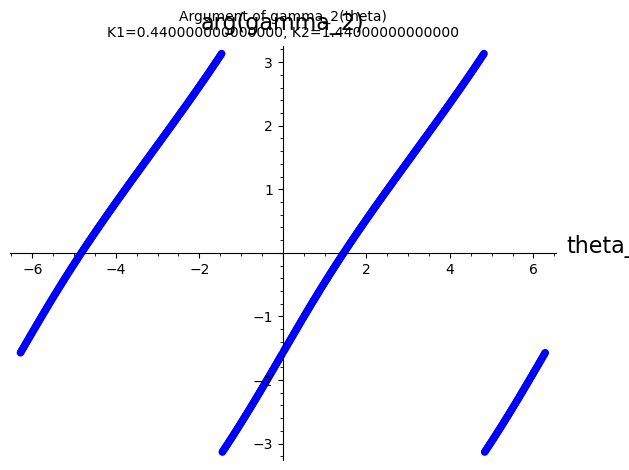

In [19]:
from sage.all import *

def analyze_gamma2_arg_fixed():
    # 1. パラメータ設定
    val_K1 = 0.44
    val_K2 = 1.44  
    val_M = 360     
    
    # 2. 定数定義
    s1 = sinh(2 * val_K1)
    c1 = cosh(2 * val_K1)
    s2 = sinh(2 * val_K2)
    c2 = cosh(2 * val_K2)
    
    # K2_star と s2_star
    val_K2_star = -0.5 * log(tanh(val_K2))
    s2_star = sinh(2 * val_K2_star)
    
    print(f"Parameters: K1={val_K1}, K2={val_K2}, M={val_M}")
    print("-" * 65)
    
    # 3. gamma_2 関数
    def get_gamma2_val(theta):
        # gamma_2 = I * e^(I*theta) * s2* * (c1*cos(theta) - I*sin(theta) - s1*c2)
        term_inside = c1 * cos(theta) - I * sin(theta) - s1 * c2
        return I * exp(I * theta) * s2_star * term_inside

    # 4. ループと計算
    mu_list = [m for m in range(-val_M, val_M + 1) if m != 0]
    results = []
    
    print(f"{'mu':^5} | {'theta_mu':^10} | {'arg(gamma_2) [rad]':^20} | {'arg(gamma_2) [deg]':^20}")
    print("-" * 65)
    
    for mu in mu_list:
        theta = (2 * pi * mu) / val_M
        
        g_val = get_gamma2_val(theta)
        
        # 数値化
        arg_rad = arg(g_val).n()
        
        # 修正箇所: degrees() 関数を使わず、計算で変換
        arg_deg = arg_rad * (180 / pi.n())
        
        results.append((mu, theta, arg_rad))
        
        print(f"{mu:^5} | {float(theta):^10.3f} | {float(arg_rad):^20.4f} | {float(arg_deg):^20.2f}")

    # 5. プロット
    plot_points = [(r[1], r[2]) for r in results]
    
    p = list_plot(plot_points, size=30, color='blue', 
                  title=f'Argument of gamma_2(theta)\nK1={val_K1}, K2={val_K2}',
                  axes_labels=['theta_mu', 'arg(gamma_2)'])
    
    show(p)

analyze_gamma2_arg_fixed()

In [21]:
from sage.all import *

def verify_expressions_without_sqrt():
    # 1. 変数の定義
    K1, K2, theta_mu = var('K1 K2 theta_mu')
    assume(K1 > 0)
    assume(K2 > 0)
    assume(theta_mu, 'real')

    # ---------------------------------------------------------
    # 重要な恒等式の準備
    # K2* の定義: K2^* = -1/2 * log(tanh K2)
    # これより導かれる関係式: tanh(K2^*) = exp(-2*K2)
    # シンボリック計算を成功させるため、これを明示的に使います。
    tanh_K2_star = exp(-2*K2)

    # ---------------------------------------------------------
    # 式 1 (Expression 1) - sqrtの中身
    # ---------------------------------------------------------
    # 分子: i * e^(i theta) * (...)
    term1_num = I * exp(I * theta_mu) * (
        cosh(2*K1) * cos(theta_mu) - I * sin(theta_mu) - sinh(2*K1) * cosh(2*K2)
    )

    # 分母: i * e^(-i theta) * (...)
    # cos(-theta) = cos(theta), sin(-theta) = -sin(theta)
    term1_den = I * exp(-I * theta_mu) * (
        cosh(2*K1) * cos(-theta_mu) - I * sin(-theta_mu) - sinh(2*K1) * cosh(2*K2)
    )

    expr1 = term1_num / term1_den

    # ---------------------------------------------------------
    # 式 2 (Expression 2) - sqrtの中身
    # ---------------------------------------------------------
    # tanh K1
    tk1 = tanh(K1)

    # 第1項: (1 - (tanh K1 * tanh K2^*) * e^(i theta)) / (1 - ... * e^(-i theta))
    coeff_1 = tk1 * tanh_K2_star
    part1 = (1 - coeff_1 * exp(I * theta_mu)) / (1 - coeff_1 * exp(-I * theta_mu))

    # 第2項: (1 - ((tanh K1)^-1 * tanh K2*)^-1 * e^(i theta)) / ...
    # 係数の計算: ((tanh K1)^-1 * tanh K2*)^-1
    # コード上ではユーザの記述通りに構成します
    inner_term = (1/tk1) * tanh_K2_star
    coeff_2 = 1 / inner_term  # 結果的に tk1 / tanh_K2_star と同じ

    part2 = (1 - coeff_2 * exp(I * theta_mu)) / (1 - coeff_2 * exp(-I * theta_mu))

    expr2 = part1 * part2

    # ---------------------------------------------------------
    # 検証 1: シンボリックな完全一致確認
    # ---------------------------------------------------------
    print("--- Symbolic Verification (Without sqrt) ---")
    print("Simplifying difference...")
    
    # exponentialize() で三角関数・双曲線関数をすべて指数関数形式に統一して簡約
    diff = (expr1 - expr2).exponentialize().full_simplify()
    
    if diff == 0:
        print("Result: The expressions match EXACTLY (Symbolic difference is 0).")
    else:
        print(f"Result: Could not simplify to 0. Remainder: {diff}")

    # ---------------------------------------------------------
    # 検証 2: 数値代入による確認
    # ---------------------------------------------------------
    print("\n--- Numerical Verification ---")
    M_val = 100
    mu_list = [m for m in range(-M_val, M_val + 1) if m != 0]
    
    # テスト用の値
    val_K1 = 10.4
    val_K2 = 1.8
    
    print(f"Parameters: K1={val_K1}, K2={val_K2}, M={M_val}")
    
    all_ok = True
    for mu in mu_list:
        th = (2 * pi * mu) / M_val
        
        # 値の計算
        v1 = expr1.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        v2 = expr2.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        
        # 差の確認
        err = abs(v1 - v2)
        if err > 1e-14:
            print(f"Mismatch at mu={mu}: |diff| = {err}")
            all_ok = False
    
    if all_ok:
        print("Result: All numerical checks passed within precision limits.")

verify_expressions_without_sqrt()

--- Symbolic Verification (Without sqrt) ---
Simplifying difference...
Result: The expressions match EXACTLY (Symbolic difference is 0).

--- Numerical Verification ---
Parameters: K1=10.4000000000000, K2=1.80000000000000, M=100
Result: All numerical checks passed within precision limits.


In [22]:
from sage.all import *

def verify_exponential_expansion_vs_tanh_product():
    # 1. 変数定義
    K1, K2, theta_mu = var('K1 K2 theta_mu')
    assume(K1 > 0)
    assume(K2 > 0)
    assume(theta_mu, 'real')

    # 双対性の関係式（検証の要）
    # K2* = -1/2 log(tanh K2) => tanh(K2*) = e^(-2K2)
    tanh_K2_star = exp(-2*K2)

    # ---------------------------------------------------------
    # 式 1: 今回ご提示の「指数関数による完全展開形」
    # ---------------------------------------------------------
    # cosh(x) = (e^x + e^-x)/2, sin(x) = (e^ix - e^-ix)/2i 等を直接記述した形
    
    # 共通パーツの定義
    def e_term(x): return exp(x)
    
    # 分子 (Numerator)
    # e^(i theta) * [ cosh(2K1)*cos(theta) - i*sin(theta) - sinh(2K1)*cosh(2K2) ] の展開
    
    # 各項の定義 (プロンプトの記述に従う)
    term_cosh_2K1 = (exp(2*K1) + exp(-2*K1)) / 2
    term_cos_theta = (exp(I*theta_mu) + exp(-I*theta_mu)) / 2
    
    # - i * sin(theta) の部分
    # プロンプト: - sqrt(-1) * (e - e) / (2 sqrt(-1)) -> - (e - e) / 2
    term_i_sin_theta = I * (exp(I*theta_mu) - exp(-I*theta_mu)) / (2*I) 
    
    term_sinh_2K1 = (exp(2*K1) - exp(-2*K1)) / 2
    term_cosh_2K2 = (exp(2*K2) + exp(-2*K2)) / 2
    
    # 分子全体
    num_exp_form = exp(I*theta_mu) * (
        term_cosh_2K1 * term_cos_theta
        - term_i_sin_theta
        - term_sinh_2K1 * term_cosh_2K2
    )

    # 分母 (Denominator)
    # theta -> -theta になったもの
    term_cos_minus_theta = (exp(-I*theta_mu) + exp(I*theta_mu)) / 2
    term_i_sin_minus_theta = I * (exp(-I*theta_mu) - exp(I*theta_mu)) / (2*I)
    
    den_exp_form = exp(-I*theta_mu) * (
        term_cosh_2K1 * term_cos_minus_theta
        - term_i_sin_minus_theta
        - term_sinh_2K1 * term_cosh_2K2
    )
    
    expr_exponential = num_exp_form / den_exp_form

    # ---------------------------------------------------------
    # 式 2: 前回の「tanh積形式 (Dual form)」
    # ---------------------------------------------------------
    tk1 = tanh(K1)
    
    # 因子A
    coeff_A = tk1 * tanh_K2_star
    partA = (1 - coeff_A * exp(I * theta_mu)) / (1 - coeff_A * exp(-I * theta_mu))
    
    # 因子B (係数が逆数)
    coeff_B = 1 / ((1/tk1) * tanh_K2_star)
    partB = (1 - coeff_B * exp(I * theta_mu)) / (1 - coeff_B * exp(-I * theta_mu))
    
    expr_tanh_product = partA * partB

    # ---------------------------------------------------------
    # 検証 1: シンボリック比較
    # ---------------------------------------------------------
    print("--- Symbolic Verification ---")
    print("Comparing 'Explicit Exponential Form' vs 'Tanh Product Form'...")
    
    # 両方を指数関数形式で展開して差をとる
    diff = (expr_exponential - expr_tanh_product).exponentialize().full_simplify()
    
    if diff == 0:
        print("Result: MATCH. (Symbolic difference is 0)")
    else:
        print(f"Result: Mismatch. Difference: {diff}")

    # ---------------------------------------------------------
    # 検証 2: 数値比較
    # ---------------------------------------------------------
    print("\n--- Numerical Verification ---")
    val_K1 = 0.3
    val_K2 = 0.9
    M_val = 5
    
    print(f"Checking mu for M={M_val}, K1={val_K1}, K2={val_K2}")
    
    all_passed = True
    for mu in range(-M_val, M_val + 1):
        if mu == 0: continue
        th = (2 * pi * mu) / M_val
        
        v1 = expr_exponential.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        v2 = expr_tanh_product.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        
        if abs(v1 - v2) > 1e-14:
            print(f"Fail at mu={mu}: {abs(v1 - v2)}")
            all_passed = False
            
    if all_passed:
        print("Result: All numerical checks passed.")

verify_exponential_expansion_vs_tanh_product()

--- Symbolic Verification ---
Comparing 'Explicit Exponential Form' vs 'Tanh Product Form'...
Result: MATCH. (Symbolic difference is 0)

--- Numerical Verification ---
Checking mu for M=5, K1=0.300000000000000, K2=0.900000000000000
Result: All numerical checks passed.


In [23]:
from sage.all import *

def verify_quadratic_expansion_vs_product():
    # 1. 変数定義
    K1, K2, theta_mu = var('K1 K2 theta_mu')
    assume(K1 > 0)
    assume(K2 > 0)
    assume(theta_mu, 'real')

    # 重要な恒等式: tanh(K2^*) = exp(-2*K2)
    # これを代入して変数をK1, K2に統一します
    tanh_K2_star = exp(-2*K2)

    # ---------------------------------------------------------
    # 式 1 (Expression 1): 展開された形式
    # ---------------------------------------------------------
    # 項の定義
    # A = e^(2K1) + e^(-2K1) + 1
    term_A = exp(2*K1) + exp(-2*K1) + 1
    
    # B = (e^(2K1) - e^(-2K1)) * (e^(2K2) + e^(-2K2))
    term_B = (exp(2*K1) - exp(-2*K1)) * (exp(2*K2) + exp(-2*K2))
    
    # C = e^(2K1) + e^(-2K1) - 1
    term_C = exp(2*K1) + exp(-2*K1) - 1

    # 分子: A - B * e^(i theta) + C * e^(2i theta)
    num_1 = term_A - term_B * exp(I*theta_mu) + term_C * exp(2*I*theta_mu)
    
    # 分母: A - B * e^(-i theta) + C * e^(-2i theta)
    den_1 = term_A - term_B * exp(-I*theta_mu) + term_C * exp(-2*I*theta_mu)
    
    expr1 = num_1 / den_1

    # ---------------------------------------------------------
    # 式 2 (Expression 2): 積の形式
    # ---------------------------------------------------------
    tk1 = tanh(K1)
    
    # 因子1: (1 - z1 * e^(i theta)) / (1 - z1 * e^(-i theta))
    # z1 = tanh K1 * tanh K2^*
    z1 = tk1 * tanh_K2_star
    factor1 = (1 - z1 * exp(I*theta_mu)) / (1 - z1 * exp(-I*theta_mu))
    
    # 因子2: (1 - z2 * e^(i theta)) / (1 - z2 * e^(-i theta))
    # 係数の定義: z2 = ((tanh K1)^(-1) * tanh K2^*)^(-1)
    #                = 1 / ( (1/tanh K1) * tanh K2^* )
    #                = tanh K1 / tanh K2^*
    z2 = 1 / ((1/tk1) * tanh_K2_star)
    factor2 = (1 - z2 * exp(I*theta_mu)) / (1 - z2 * exp(-I*theta_mu))
    
    expr2 = factor1 * factor2

    # ---------------------------------------------------------
    # 検証 1: シンボリックな比較
    # ---------------------------------------------------------
    print("--- Symbolic Verification ---")
    print("Simplifying difference between Expression 1 and Expression 2...")
    
    # exponentialize()ですべてを指数関数形式に変換してから簡約
    diff = (expr1 - expr2).exponentialize().full_simplify()
    
    if diff == 0:
        print("Result: MATCH. The expressions are identical.")
    else:
        print(f"Result: Mismatch. Difference remainder: {diff}")
        # 万が一0にならない場合、比例定数のズレなどを確認するための比率計算
        # ratio = (expr1 / expr2).exponentialize().full_simplify()
        # print(f"Ratio check (should be 1): {ratio}")

    # ---------------------------------------------------------
    # 検証 2: 数値比較
    # ---------------------------------------------------------
    print("\n--- Numerical Verification ---")
    val_K1 = 0.5
    val_K2 = 1.1
    M_val = 6
    
    print(f"Checking for K1={val_K1}, K2={val_K2}, M={M_val}")
    
    all_ok = True
    for mu in range(-M_val, M_val + 1):
        if mu == 0: continue
        th = (2 * pi * mu) / M_val
        
        v1 = expr1.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        v2 = expr2.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        
        if abs(v1 - v2) > 1e-13:
            print(f"Fail at mu={mu}: |diff| = {abs(v1 - v2)}")
            all_ok = False
            
    if all_ok:
        print("Result: All numerical checks passed.")

verify_quadratic_expansion_vs_product()

--- Symbolic Verification ---
Simplifying difference between Expression 1 and Expression 2...
Result: Mismatch. Difference remainder: 2*((e^(6*K1) + e^(2*K1))*e^(4*K2 + 6*I*theta_mu) - (e^(6*K1) + e^(2*K1))*e^(4*K2 + 2*I*theta_mu) - ((e^(6*K1) - e^(2*K1))*e^(6*K2) + (e^(6*K1) - e^(2*K1))*e^(2*K2))*e^(5*I*theta_mu) + ((e^(6*K1) - e^(2*K1))*e^(6*K2) + (e^(6*K1) - e^(2*K1))*e^(2*K2))*e^(3*I*theta_mu))/((e^(8*K1) - 3*e^(6*K1) + 4*e^(4*K1) - 3*e^(2*K1) + 1)*e^(4*K2) + (e^(8*K1) + 3*e^(6*K1) + 4*e^(4*K1) + 3*e^(2*K1) + 1)*e^(4*K2 + 4*I*theta_mu) - ((2*e^(8*K1) + 3*e^(6*K1) - 3*e^(2*K1) - 2)*e^(6*K2) + (2*e^(8*K1) + 3*e^(6*K1) - 3*e^(2*K1) - 2)*e^(2*K2))*e^(3*I*theta_mu) + ((e^(8*K1) - 2*e^(4*K1) + 1)*e^(8*K2) + 4*(e^(8*K1) - e^(4*K1) + 1)*e^(4*K2) + e^(8*K1) - 2*e^(4*K1) + 1)*e^(2*I*theta_mu) - ((2*e^(8*K1) - 3*e^(6*K1) + 3*e^(2*K1) - 2)*e^(6*K2) + (2*e^(8*K1) - 3*e^(6*K1) + 3*e^(2*K1) - 2)*e^(2*K2))*e^(I*theta_mu))

--- Numerical Verification ---
Checking for K1=0.500000000000000, K2=1.1000

In [24]:
from sage.all import *

def verify_quadratic_expansion_vs_product():
    # 1. 変数定義
    K1, K2, theta_mu = var('K1 K2 theta_mu')
    assume(K1 > 0)
    assume(K2 > 0)
    assume(theta_mu, 'real')

    # 重要な恒等式: tanh(K2^*) = exp(-2*K2)
    # これを代入して変数をK1, K2に統一します
    tanh_K2_star = exp(-2*K2)

    # ---------------------------------------------------------
    # 式 1 (Expression 1): 展開された形式
    # ---------------------------------------------------------
    # 項の定義
    # A = e^(2K1) + e^(-2K1) + 1
    term_A = exp(2*K1) + exp(-2*K1) + 1
    
    # B = (e^(2K1) - e^(-2K1)) * (e^(2K2) + e^(-2K2))
    term_B = (exp(2*K1) - exp(-2*K1)) * (exp(2*K2) + exp(-2*K2))
    
    # C = e^(2K1) + e^(-2K1) - 1
    term_C = exp(2*K1) + exp(-2*K1) - 1

    # 分子: A - B * e^(i theta) + C * e^(2i theta)
    num_1 = term_A - term_B * exp(I*theta_mu) + term_C * exp(2*I*theta_mu)
    
    # 分母: A - B * e^(-i theta) + C * e^(-2i theta)
    den_1 = term_A - term_B * exp(-I*theta_mu) + term_C * exp(-2*I*theta_mu)
    
    expr1 = num_1 / den_1

    # ---------------------------------------------------------
    # 式 2 (Expression 2): 積の形式
    # ---------------------------------------------------------
    tk1 = tanh(K1)
    
    # 因子1: (1 - z1 * e^(i theta)) / (1 - z1 * e^(-i theta))
    # z1 = tanh K1 * tanh K2^*
    z1 = tk1 * tanh_K2_star
    factor1 = (1 - z1 * exp(I*theta_mu)) / (1 - z1 * exp(-I*theta_mu))
    
    # 因子2: (1 - z2 * e^(i theta)) / (1 - z2 * e^(-i theta))
    # 係数の定義: z2 = ((tanh K1)^(-1) * tanh K2^*)^(-1)
    #                = 1 / ( (1/tanh K1) * tanh K2^* )
    #                = tanh K1 / tanh K2^*
    z2 = 1 / ((1/tk1) * tanh_K2_star)
    factor2 = (1 - z2 * exp(I*theta_mu)) / (1 - z2 * exp(-I*theta_mu))
    
    expr2 = factor1 * factor2

    # ---------------------------------------------------------
    # 検証 1: シンボリックな比較
    # ---------------------------------------------------------
    print("--- Symbolic Verification ---")
    print("Simplifying difference between Expression 1 and Expression 2...")
    
    # exponentialize()ですべてを指数関数形式に変換してから簡約
    diff = (expr1 - expr2).exponentialize().full_simplify()
    
    if diff == 0:
        print("Result: MATCH. The expressions are identical.")
    else:
        print(f"Result: Mismatch. Difference remainder: {diff}")
        # 万が一0にならない場合、比例定数のズレなどを確認するための比率計算
        # ratio = (expr1 / expr2).exponentialize().full_simplify()
        # print(f"Ratio check (should be 1): {ratio}")

    # ---------------------------------------------------------
    # 検証 2: 数値比較
    # ---------------------------------------------------------
    print("\n--- Numerical Verification ---")
    val_K1 = 0.5
    val_K2 = 1.1
    M_val = 6
    
    print(f"Checking for K1={val_K1}, K2={val_K2}, M={M_val}")
    
    all_ok = True
    for mu in range(-M_val, M_val + 1):
        if mu == 0: continue
        th = (2 * pi * mu) / M_val
        
        v1 = expr1.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        v2 = expr2.subs(K1=val_K1, K2=val_K2, theta_mu=th).n()
        
        if abs(v1 - v2) > 1e-13:
            print(f"Fail at mu={mu}: |diff| = {abs(v1 - v2)}")
            all_ok = False
            
    if all_ok:
        print("Result: All numerical checks passed.")

verify_quadratic_expansion_vs_product()

--- Symbolic Verification ---
Simplifying difference between Expression 1 and Expression 2...
Result: Mismatch. Difference remainder: 2*((e^(6*K1) + e^(2*K1))*e^(4*K2 + 6*I*theta_mu) - (e^(6*K1) + e^(2*K1))*e^(4*K2 + 2*I*theta_mu) - ((e^(6*K1) - e^(2*K1))*e^(6*K2) + (e^(6*K1) - e^(2*K1))*e^(2*K2))*e^(5*I*theta_mu) + ((e^(6*K1) - e^(2*K1))*e^(6*K2) + (e^(6*K1) - e^(2*K1))*e^(2*K2))*e^(3*I*theta_mu))/((e^(8*K1) - 3*e^(6*K1) + 4*e^(4*K1) - 3*e^(2*K1) + 1)*e^(4*K2) + (e^(8*K1) + 3*e^(6*K1) + 4*e^(4*K1) + 3*e^(2*K1) + 1)*e^(4*K2 + 4*I*theta_mu) - ((2*e^(8*K1) + 3*e^(6*K1) - 3*e^(2*K1) - 2)*e^(6*K2) + (2*e^(8*K1) + 3*e^(6*K1) - 3*e^(2*K1) - 2)*e^(2*K2))*e^(3*I*theta_mu) + ((e^(8*K1) - 2*e^(4*K1) + 1)*e^(8*K2) + 4*(e^(8*K1) - e^(4*K1) + 1)*e^(4*K2) + e^(8*K1) - 2*e^(4*K1) + 1)*e^(2*I*theta_mu) - ((2*e^(8*K1) - 3*e^(6*K1) + 3*e^(2*K1) - 2)*e^(6*K2) + (2*e^(8*K1) - 3*e^(6*K1) + 3*e^(2*K1) - 2)*e^(2*K2))*e^(I*theta_mu))

--- Numerical Verification ---
Checking for K1=0.500000000000000, K2=1.1000

In [26]:
# 変数の定義
var('K1 K2 K2_star theta_mu')

# 定数の定義 (i)
I = i   # SageMathでは i または I が虚数単位

# 制約条件: K1, K2, K2_star は正の実数、theta_muは実数
assume(K1 > 0, K2 > 0, K2_star > 0)
assume(theta_mu, 'real')

# 式1 (Expression 1) の定義
# ユーザー入力の構造を維持しつつ定義します
term1_num = exp(I * theta_mu) * (
    (exp(2*K1) + exp(-2*K1))/2 * (exp(I*theta_mu) + exp(-I*theta_mu))/2 
    - I * (exp(I*theta_mu) - exp(-I*theta_mu))/(2*I) 
    - (exp(2*K1) - exp(-2*K1))/2 * (exp(2*K2) + exp(-2*K2))/2
)

term1_den = exp(-I * theta_mu) * (
    (exp(2*K1) + exp(-2*K1))/2 * (exp(-I*theta_mu) + exp(I*theta_mu))/2 
    - I * (exp(-I*theta_mu) - exp(I*theta_mu))/(2*I) 
    - (exp(2*K1) - exp(-2*K1))/2 * (exp(2*K2) + exp(-2*K2))/2
)

expr1_squared = term1_num / term1_den

# 式2 (Expression 2) の定義
# A = tanh(K1) * tanh(K2_star)
# B = ((tanh K_1)^(-1) tanh K_2^*)^(-1) = tanh(K1) / tanh(K2_star)
A = tanh(K1) * tanh(K2_star)
B = 1 / ((1/tanh(K1)) * tanh(K2_star))

expr2_squared = (
    (1 - A * exp(I * theta_mu)) / (1 - A * exp(-I * theta_mu)) *
    (1 - B * exp(I * theta_mu)) / (1 - B * exp(-I * theta_mu))
)

# 双対性の関係式 (Duality Relation)
# sinh(K2) * sinh(K2_star) = 1 から tanh(K2_star) を導出
# tanh(K2_star) = 1 / cosh(K2) になります
# 導出: sinh(K2*) = 1/sinh(K2) => cosh(K2*) = sqrt(1+1/sinh^2(K2)) = cosh(K2)/sinh(K2)
# => tanh(K2*) = sinh(K2*)/cosh(K2*) = (1/sinh(K2)) / (cosh(K2)/sinh(K2)) = 1/cosh(K2)
duality_substitution = {tanh(K2_star): 1/cosh(K2)}

# 検証
# 式2に双対性を適用
expr2_squared_sub = expr2_squared.subs(duality_substitution)

# 2つの式の比率を取り、1になるか確認 (引き算で0になるかでも可)
# 複雑な三角関数・双曲線関数の簡約化を行う
check = (expr1_squared / expr2_squared_sub).full_simplify()

print(f"Verification result (Ratio of squared expressions): {check}")

if check == 1:
    print("SUCCESS: The two expressions are algebraically equivalent under the duality relation.")
else:
    print("FAILURE: The expressions could not be simplified to match.")

Verification result (Ratio of squared expressions): ((e^(4*K1) - 2*e^(2*K1) + 1)*cosh(K1)^2*cosh(K2)*e^(2*K2 + 4*I*theta_mu) + (e^(4*K1) + 2*e^(2*K1) + 1)*cosh(K2)*e^(2*K2)*sinh(K1)^2 - ((e^(4*K1) - 2*e^(2*K1) + 1)*cosh(K1)*e^(2*K2)*sinh(K1)*sinh(K2)^2 + 2*(e^(4*K1) - 2*e^(2*K1) + 1)*cosh(K1)*e^(2*K2)*sinh(K1) + ((e^(4*K1) - 1)*cosh(K1)^2*e^(4*K2) + (e^(4*K1) - 1)*cosh(K1)^2)*cosh(K2))*e^(3*I*theta_mu) + (2*(e^(4*K1) - 1)*cosh(K1)*e^(4*K2)*sinh(K1) + ((e^(4*K1) + 2*e^(2*K1) + 1)*cosh(K1)^2 + (e^(4*K1) - 2*e^(2*K1) + 1)*sinh(K1)^2)*cosh(K2)*e^(2*K2) + 2*(e^(4*K1) - 1)*cosh(K1)*sinh(K1) + ((e^(4*K1) - 1)*cosh(K1)*e^(4*K2)*sinh(K1) + (e^(4*K1) - 1)*cosh(K1)*sinh(K1))*sinh(K2)^2)*e^(2*I*theta_mu) - ((e^(4*K1) + 2*e^(2*K1) + 1)*cosh(K1)*e^(2*K2)*sinh(K1)*sinh(K2)^2 + 2*(e^(4*K1) + 2*e^(2*K1) + 1)*cosh(K1)*e^(2*K2)*sinh(K1) + ((e^(4*K1) - 1)*e^(4*K2)*sinh(K1)^2 + (e^(4*K1) - 1)*sinh(K1)^2)*cosh(K2))*e^(I*theta_mu))/((e^(4*K1) - 2*e^(2*K1) + 1)*cosh(K1)^2*cosh(K2)*e^(2*K2) + (e^(4*K1) + 2*e^(

In [53]:
# ---------------------------------------------------------
# SageMath: 式1と式2の等価性検証コード（新しい式1,2版）
# ---------------------------------------------------------

# 変数の定義
var('K1 K2 theta_mu')

# K2^* = e^(-2 K2)（旧式2で使用していたが、ここでは未使用）
K2_star = exp(-2*K2)

# ---------------------------------------------------------
# 式1の定義（新しい式1）
# ---------------------------------------------------------
# 式1:
# sqrt(
#   (
#     e^(sqrt(-1) theta_(mu))
#     (
#       (e^(2 K_1) + e^(-2 K_1)) e^(sqrt(-1) theta_(mu))
#       + (e^(2 K_1) + e^(-2 K_1)) e^(-sqrt(-1) theta_(mu))
#       - e^(sqrt(-1) theta_(mu))
#       + e^(-sqrt(-1) theta_(mu))
#       - (e^(2 K_1) - e^(-2 K_1)) (e^(2 K_2) + e^(-2 K_2))
#     )
#   )
#   /
#   (
#     e^(-sqrt(-1) theta_(mu))
#     (
#       (e^(2 K_1) + e^(-2 K_1)) e^(-sqrt(-1) theta_(mu))
#       + (e^(2 K_1) + e^(-2 K_1)) e^(sqrt(-1) theta_(mu))
#       - e^(-sqrt(-1) theta_(mu))
#       + e^(sqrt(-1) theta_(mu))
#       - (e^(2 K_1) - e^(-2 K_1)) (e^(2 K_2) + e^(-2 K_2))
#     )
#   )
# )

i = I  # Sage では I が虚数単位

rad1 = (
    exp(i*theta_mu)
    * (
        (exp(2*K1) + exp(-2*K1))*exp(i*theta_mu)
        + (exp(2*K1) + exp(-2*K1))*exp(-i*theta_mu)
        - exp(i*theta_mu)
        + exp(-i*theta_mu)
        - (exp(2*K1) - exp(-2*K1))*(exp(2*K2) + exp(-2*K2))
      )
) / (
    exp(-i*theta_mu)
    * (
        (exp(2*K1) + exp(-2*K1))*exp(-i*theta_mu)
        + (exp(2*K1) + exp(-2*K1))*exp(i*theta_mu)
        - exp(-i*theta_mu)
        + exp(i*theta_mu)
        - (exp(2*K1) - exp(-2*K1))*(exp(2*K2) + exp(-2*K2))
      )
)

expr1 = sqrt(rad1)

# 簡約
rad1_simplified = rad1.simplify_full()

print("\n--- rad1 simplified ---")
print(rad1_simplified)

# ---------------------------------------------------------
# 式2の定義（新しい式2）
# ---------------------------------------------------------
# 式2:
# sqrt(
#   (
#     (e^(2 K_1) + e^(-2 K_1)) e^(2 sqrt(-1) theta_(mu))
#     + (e^(2 K_1) + e^(-2 K_1))
#     - e^(2 sqrt(-1) theta_(mu))
#     + 1
#     - (e^(2 K_1) - e^(-2 K_1)) (e^(2 K_2) + e^(-2 K_2)) e^(sqrt(-1) theta_(mu))
#   )
#   /
#   (
#     (e^(2 K_1) + e^(-2 K_1)) e^(-2 sqrt(-1) theta_(mu))
#     + (e^(2 K_1) + e^(-2 K_1))
#     - e^(-2 sqrt(-1) theta_(mu))
#     + 1
#     - (e^(2 K_1) - e^(-2 K_1)) (e^(2 K_2) + e^(-2 K_2)) e^(-sqrt(-1) theta_(mu))
#   )
# )

num2 = (
    (exp(2*K1) + exp(-2*K1))*exp(2*i*theta_mu)
    + (exp(2*K1) + exp(-2*K1))
    - exp(2*i*theta_mu)
    + 1
    - (exp(2*K1) - exp(-2*K1))*(exp(2*K2) + exp(-2*K2))*exp(i*theta_mu)
)

den2 = (
    (exp(2*K1) + exp(-2*K1))*exp(-2*i*theta_mu)
    + (exp(2*K1) + exp(-2*K1))
    - exp(-2*i*theta_mu)
    + 1
    - (exp(2*K1) - exp(-2*K1))*(exp(2*K2) + exp(-2*K2))*exp(-i*theta_mu)
)

rad2 = num2/den2
expr2 = sqrt(rad2)

rad2_simplified = rad2.simplify_full()

print("\n--- rad2 simplified ---")
print(rad2_simplified)

# ---------------------------------------------------------
# 記号的な等価性チェック（平方根の中身同士）
# ---------------------------------------------------------
print("\n--- Symbolic check of radicands ---")
diff_rad = (rad1_simplified - rad2_simplified).simplify_full()
print("rad1 - rad2 simplified =")
print(diff_rad)

# 可能なら bool(...) で 0 かどうか評価
try:
    print("Is rad1_simplified == rad2_simplified ? ->", bool(diff_rad == 0))
except Exception as e:
    print("bool 判定時にエラー:", e)

# ---------------------------------------------------------
# 数値代入による確認（ユーザ指定のスタイル）
# ---------------------------------------------------------
print("\n--- Numerical Verification (theta_mu grid) ---")
M_val = 100
mu_list = [m for m in range(-M_val, M_val + 1) if m != 0]

# テスト用の値（必要に応じて変更したり増やしたりしてよい）
val_K1 = 10.4
val_K2 = 1.8

print(f"Parameters: K1={val_K1}, K2={val_K2}, M={M_val}")

all_ok = True
for mu in mu_list:
    th = (2 * pi * mu) / M_val

    # 値の計算（平方根を含む元の式）
    v1 = expr1.subs({K1: val_K1, K2: val_K2, theta_mu: th}).n()
    v2 = expr2.subs({K1: val_K1, K2: val_K2, theta_mu: th}).n()

    err = abs(v1 - v2)
    if err > 1e-14:
        print(f"Mismatch at mu={mu}: |expr1 - expr2| = {err}")
        all_ok = False

if all_ok:
    print("Result: All numerical checks (with sqrt) passed within precision limits.")

# ---------------------------------------------------------
# 平方根の枝の影響を避けるため、平方根の中身（rad1, rad2）でも数値チェック
# ---------------------------------------------------------
print("\n--- Numerical Verification (inside square roots: rad1 vs rad2) ---")
all_ok_rad = True
for mu in mu_list:
    th = (2 * pi * mu) / M_val

    vv1 = rad1_simplified.subs({K1: val_K1, K2: val_K2, theta_mu: th}).n()
    vv2 = rad2_simplified.subs({K1: val_K1, K2: val_K2, theta_mu: th}).n()

    err = abs(vv1 - vv2)
    if err > 1e-14:
        print(f"Mismatch at mu={mu}: |rad1 - rad2| = {err}")
        all_ok_rad = False

if all_ok_rad:
    print("Result: All numerical checks (radicands) passed within precision limits.")



--- rad1 simplified ---
((e^(4*K1) - e^(2*K1) + 1)*e^(2*K2 + 4*I*theta_mu) + (e^(4*K1) + e^(2*K1) + 1)*e^(2*K2 + 2*I*theta_mu) - ((e^(4*K1) - 1)*e^(4*K2) + e^(4*K1) - 1)*e^(3*I*theta_mu))/((e^(4*K1) - e^(2*K1) + 1)*e^(2*K2) + (e^(4*K1) + e^(2*K1) + 1)*e^(2*K2 + 2*I*theta_mu) - ((e^(4*K1) - 1)*e^(4*K2) + e^(4*K1) - 1)*e^(I*theta_mu))

--- rad2 simplified ---
((e^(4*K1) - e^(2*K1) + 1)*e^(2*K2 + 4*I*theta_mu) + (e^(4*K1) + e^(2*K1) + 1)*e^(2*K2 + 2*I*theta_mu) - ((e^(4*K1) - 1)*e^(4*K2) + e^(4*K1) - 1)*e^(3*I*theta_mu))/((e^(4*K1) - e^(2*K1) + 1)*e^(2*K2) + (e^(4*K1) + e^(2*K1) + 1)*e^(2*K2 + 2*I*theta_mu) - ((e^(4*K1) - 1)*e^(4*K2) + e^(4*K1) - 1)*e^(I*theta_mu))

--- Symbolic check of radicands ---
rad1 - rad2 simplified =
0
Is rad1_simplified == rad2_simplified ? -> True

--- Numerical Verification (theta_mu grid) ---
Parameters: K1=10.4000000000000, K2=1.80000000000000, M=100
Mismatch at mu=-75: |expr1 - expr2| = 2.00000000000000
Mismatch at mu=-74: |expr1 - expr2| = 2.0000000000000